<a href="https://colab.research.google.com/github/takecx/MachineLearning/blob/master/trim_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [0]:
drive_base = '/content/drive/My Drive/kaggle/bengaliai/bengaliai-cv19'

In [0]:
# parquets = ['train_image_data_0.parquet','train_image_data_1.parquet','train_image_data_2.parquet','train_image_data_3.parquet']
img0 = pd.read_parquet(os.path.join(drive_base,'train_image_data_0.parquet'))
#img1 = pd.read_parquet(os.path.join(drive_base,'train_image_data_1.parquet'))
#img2 = pd.read_parquet(os.path.join(drive_base,'train_image_data_2.parquet'))
#img3 = pd.read_parquet(os.path.join(drive_base,'train_image_data_3.parquet'))

#train_images = pd.concat([img0,img1,img2,img3])
train_images = img0

In [8]:
train_images

,image_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,32292,32293,32294,32295,32296,32297,32298,32299,32300,32301,32302,32303,32304,32305,32306,32307,32308,32309,32310,32311,32312,32313,32314,32315,32316,32317,32318,32319,32320,32321,32322,32323,32324,32325,32326,32327,32328,32329,32330,32331
0,Train_0,254,253,252,253,251,252,253,251,251,253,254,253,253,253,254,253,252,253,253,253,253,252,252,253,253,252,252,253,252,252,252,253,254,253,253,252,252,252,253,...,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,251
1,Train_1,251,244,238,245,248,246,246,247,251,252,250,250,246,249,248,250,249,251,252,253,253,253,253,253,253,253,250,249,251,252,251,251,251,251,252,253,251,250,252,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,254
2,Train_2,251,250,249,250,249,245,247,252,252,252,253,252,252,251,250,251,253,254,251,251,252,252,253,253,252,251,251,249,251,252,252,253,252,251,251,251,250,250,252,...,253,253,252,252,252,253,253,253,253,253,252,251,251,250,250,250,251,251,251,250,250,250,251,252,253,253,253,253,254,254,254,253,252,252,253,253,253,253,251,249
3,Train_3,247,247,249,253,253,252,251,251,250,250,251,250,249,251,251,251,250,252,251,245,245,251,252,251,252,252,250,249,250,251,250,249,250,251,252,253,252,252,252,...,253,252,252,254,253,253,254,253,252,253,254,253,252,253,254,254,254,254,254,254,254,254,253,252,253,254,253,252,253,254,254,254,254,254,254,253,253,252,251,252
4,Train_4,249,248,246,246,248,244,242,242,229,225,231,229,229,228,221,224,226,221,221,220,217,217,218,219,222,224,214,218,227,227,227,228,224,231,235,235,233,212,183,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50205,Train_50205,247,250,250,250,252,250,250,250,251,250,251,250,251,250,251,254,253,253,253,253,253,253,253,253,253,253,253,253,253,253,254,254,254,254,253,252,251,251,251,...,251,252,251,250,248,246,248,250,252,251,250,248,245,243,244,247,251,251,249,248,248,250,253,253,249,247,249,252,252,250,246,248,252,252,249,248,250,247,243,243
50206,Train_50206,250,251,250,244,245,243,246,248,246,247,248,251,249,247,250,251,249,248,249,247,249,251,248,245,248,250,248,248,245,246,247,244,244,247,248,248,244,236,240,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,253
50207,Train_50207,246,245,246,246,245,245,247,247,245,246,246,245,246,247,247,246,247,248,245,242,244,247,247,247,247,247,244,244,246,246,245,245,247,247,246,246,247,246,244,...,244,245,247,248,246,244,245,247,248,248,247,245,242,243,244,243,246,250,249,246,247,248,246,246,247,246,245,245,246,248,247,246,248,246,245,248,249,246,243,245
50208,Train_50208,246,242,240,244,247,242,239,241,245,245,243,244,245,243,244,247,247,245,241,240,244,246,244,240,241,245,245,241,243,245,244,242,243,243,241,241,243,245,245,...,250,250,249,246,244,244,243,242,242,243,244,243,241,241,243,247,250,250,247,247,250,248,248,249,248,247,248,251,251,249,247,247,247,247,247,246,246,248,248,247


(array([  145.,   744.,   840.,   510.,   333.,   297.,   388.,   397.,
          505., 28173.]),
 array([22.0, 45.3, 68.6, 91.9, 115.2, 138.5, 161.8, 185.1, 208.4,
        231.70000000000002, 255.0], dtype=object),
 <a list of 10 Patch objects>)

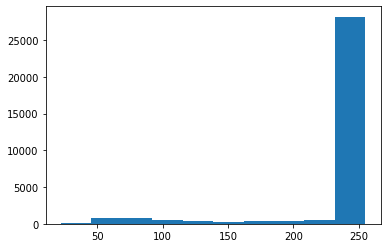

In [10]:
plt.hist(train_images.iloc[0][1:])

In [0]:
def trim(img,thresh=150):
    h,w = img.shape

    # preprocess
    fil_val = 255
    img_th = np.where(img > thresh,fil_val,img)

    col_sum = np.sum(img_th,axis=0)
    row_sum = np.sum(img_th,axis=1)

    # height
    # min_h = np.max(np.where(row_sum == fil_val*w)) if row_sum[0] == fil_val * w else 0
    # max_h = h - np.max(np.where(row_sum[::-1] == fil_val*w)) if row_sum[::-1][0] == fil_val * w else h
    min_h = h
    for i in range(h):
        if row_sum[i] != fil_val * w:
            min_h = i
            break
    max_h = 0
    for i in range(h):
        if row_sum[h-1-i] != fil_val * w:
            max_h = h-i
            break

    # width
    # min_w = np.max(np.where(col_sum == fil_val * h)) if col_sum[0] == fil_val * h else 0
    # max_w = w - np.max(np.where(col_sum[::-1] == fil_val * h)) if col_sum[::-1][0] == fil_val * h else w
    min_w = w
    for i in range(w):
        if col_sum[i] != fil_val * h:
            min_w = i
            break
    max_w = 0
    for i in range(w):
        if col_sum[w-1-i] != fil_val * h:
            max_w = w-i
            break

    return img[min_h:max_h,min_w:max_w]

In [51]:
from tqdm import tqdm
import cv2
size = 64
col = np.array([str(i) for i in range(size*size)])
col = np.hstack(['image_id',col])
trim_images = pd.DataFrame(columns=col)
# for i in tqdm(range(train_images.shape[0])):
for i in tqdm(range(1000)):
    img = train_images.iloc[i][1:].values.reshape((137,-1)).astype(np.float)
    trim_img = trim(img)
    resize_img = cv2.resize(trim_img,(size,size))
    series = np.hstack(['Train_' + str(i),resize_img.astype(np.int).ravel()])
    trim_images.loc[i] = series




  0%|          | 0/1000 [00:00<?, ?it/s]


  0%|          | 1/1000 [00:00<11:41,  1.42it/s]


  0%|          | 2/1000 [00:01<11:33,  1.44it/s]


  0%|          | 3/1000 [00:02<11:16,  1.47it/s]


  0%|          | 4/1000 [00:02<11:32,  1.44it/s]


  0%|          | 5/1000 [00:03<11:20,  1.46it/s]


  1%|          | 6/1000 [00:04<11:26,  1.45it/s]


  1%|          | 7/1000 [00:04<11:15,  1.47it/s]


  1%|          | 8/1000 [00:05<11:13,  1.47it/s]


  1%|          | 9/1000 [00:06<11:39,  1.42it/s]


  1%|          | 10/1000 [00:06<11:31,  1.43it/s]


  1%|          | 11/1000 [00:07<11:39,  1.41it/s]


  1%|          | 12/1000 [00:08<11:30,  1.43it/s]


  1%|▏         | 13/1000 [00:08<11:14,  1.46it/s]


  1%|▏         | 14/1000 [00:09<11:16,  1.46it/s]


  2%|▏         | 15/1000 [00:10<11:00,  1.49it/s]


  2%|▏         | 16/1000 [00:10<11:12,  1.46it/s]


  2%|▏         | 17/1000 [00:11<10:56,  1.50it/s]


  2%|▏         | 18/1000 [00:12<10:53,  1.50it/s]


  2%|▏         | 19/1000 [0

In [0]:
import feather
feather_path = 'train_image' + str(size) + '_' + str(size) + '_iter0_1000.feather'
feather.write_dataframe(trim_images,feather_path)

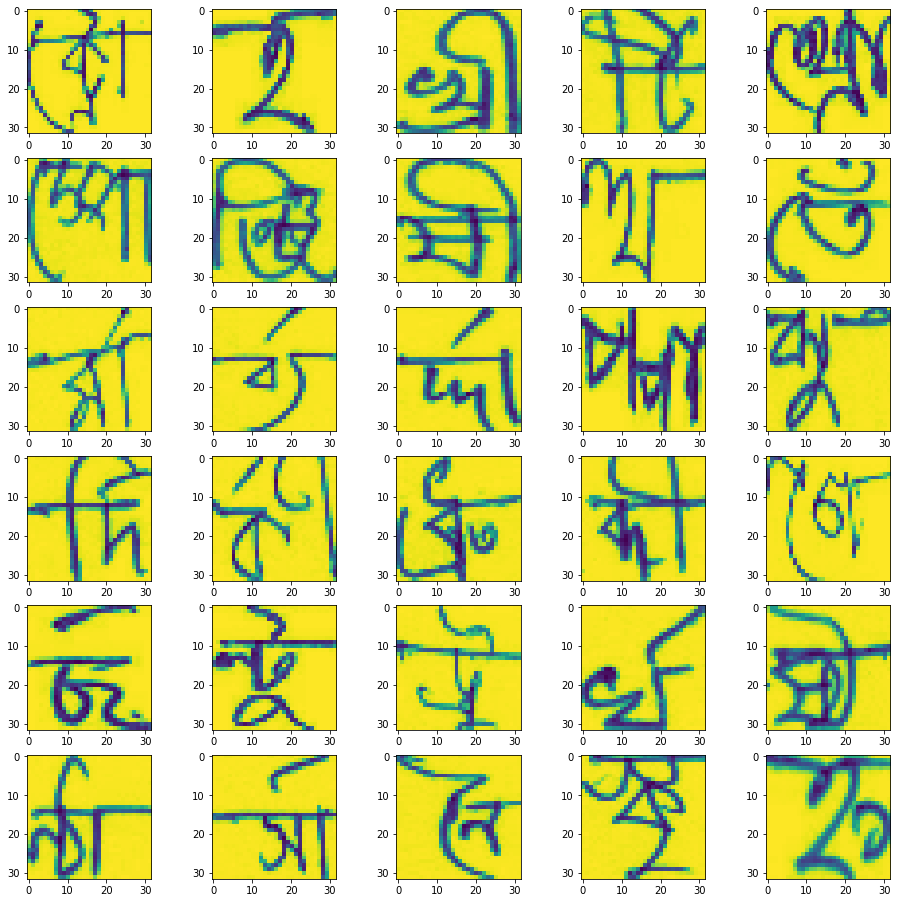

In [18]:
plt.figure(figsize=(16,16))
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.imshow(trim_images.iloc[i][1:].values.reshape(size,size).astype(np.float))
plt.show()

ValueError: cannot reshape array of size 10000 into shape (100,)

In [0]:
img = train_images.iloc[1][1:].values.reshape((137,-1)).astype(np.float)

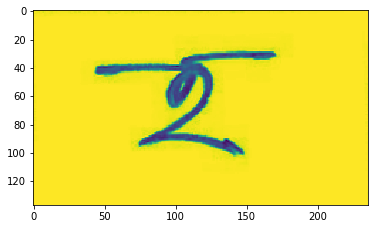

In [43]:
plt.imshow(img)

In [0]:
h,w = img.shape

# preprocess
thresh = 150
fil_val = 255
img_th = np.where(img > thresh,fil_val,img)

col_sum = np.sum(img_th,axis=0)
row_sum = np.sum(img_th,axis=1)

In [45]:
np.max(np.where(row_sum == fil_val*w)) if row_sum[0] == fil_val * w else 0

136

In [34]:
np.max(np.where(row_sum == fil_val*w))

136

In [37]:
row_sum[0]

58129.0

In [38]:
row_sum

array([58129., 57689., 57516., 57254., 57250., 57432., 57706., 58424.,
       58736., 59199., 59149., 58071., 57109., 56403., 55906., 55536.,
       55598., 55677., 55964., 56975., 56985., 56047., 50434., 46620.,
       45931., 52021., 52082., 51526., 50925., 48275., 49542., 53884.,
       54252., 54442., 54785., 54904., 55529., 55848., 56036., 56026.,
       55982., 55974., 55944., 55798., 55746., 55416., 55395., 55307.,
       55422., 55890., 56951., 56876., 56768., 56867., 55905., 55501.,
       55678., 54701., 55021., 56270., 57082., 57379., 57608., 57533.,
       57010., 56716., 56647., 56667., 56575., 56681., 56711., 56699.,
       56810., 56639., 56693., 56434., 56275., 55788., 55774., 55666.,
       56005., 56150., 56526., 57038., 57774., 58007., 58329., 58514.,
       58537., 58447., 58520., 58598., 58429., 58441., 58588., 56487.,
       54509., 53933., 54000., 55416., 56519., 57005., 57337., 57486.,
       57585., 57488., 57649., 57793., 58039., 58714., 58546., 58337.,
      

In [39]:
h - np.max(np.where(row_sum[::-1] == fil_val*w)) if row_sum[::-1][0] == fil_val * w else h

118

In [41]:
np.max(np.where(col_sum == fil_val * h)) if col_sum[0] == fil_val * h else 0

69

In [40]:
w - np.max(np.where(col_sum[::-1] == fil_val * h)) if col_sum[::-1][0] == fil_val * h else w

236